In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('/content/dengue.csv')
print(df.tail())

    p_i_d date_of_fever          residence  ... hematocri  platelet  dengue
103  P005        12-Jun            Thiland  ...      25.0     110.0     yes
104  P004        10-Sep             Jamica  ...       NaN       NaN     NaN
105  P003        12-Jun         WestIndies  ...       NaN       NaN     yes
106  P002        12-Feb            Thiland  ...       NaN       NaN     yes
107  P001         2-Jun  US Vergin Islands  ...      23.0      90.0     yes

[5 rows x 18 columns]


In [7]:
df.dengue.value_counts()

yes    72
no     27
Name: dengue, dtype: int64

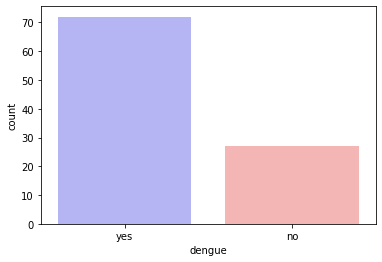

In [9]:
sns.countplot(x="dengue", data=df, palette="bwr")
plt.show()

In [10]:
print(df.shape)

print(df.dtypes)

print(df.head())

(108, 18)
p_i_d                           object
date_of_fever                   object
residence                       object
days                            object
current_temp                   float64
wbc                            float64
servere_headche                 object
pain_behind_the_eyes            object
joint_muscle_aches              object
metallic_taste_in_the_mouth     object
appetite_loss                   object
addominal_pain                  object
nausea_vomiting                 object
diarrhoea                       object
hemoglobin                     float64
hematocri                      float64
platelet                       float64
dengue                          object
dtype: object
  p_i_d date_of_fever  residence  ... hematocri  platelet  dengue
0  P012        13-Jan  Bangalore  ...       NaN     140.0     yes
1  P011        13-Feb  New Delhi  ...      22.0      80.0      no
2  P010         9-Jan     Jamica  ...       NaN     120.0     yes
3  P009   

In [11]:
df.servere_headche.replace(('yes', 'no'), (1, 0), inplace=True)
df.pain_behind_the_eyes.replace(('yes', 'no'), (1, 0), inplace=True)
df.joint_muscle_aches.replace(('yes', 'no'), (1, 0), inplace=True)
df.metallic_taste_in_the_mouth.replace(('yes', 'no'), (1, 0), inplace=True)
df.appetite_loss.replace(('yes', 'no'), (1, 0), inplace=True)
df.addominal_pain.replace(('yes', 'no'), (1, 0), inplace=True)
df.nausea_vomiting.replace(('yes', 'no'), (1, 0), inplace=True)
df.diarrhoea.replace(('yes', 'no'), (1, 0), inplace=True)

In [14]:
df.replace([np.inf, -np.inf], 0, inplace=True)
df.replace((np.nan),0 , inplace=True)
df.head()

,p_i_d,date_of_fever,residence,days,current_temp,wbc,servere_headche,pain_behind_the_eyes,joint_muscle_aches,metallic_taste_in_the_mouth,appetite_loss,addominal_pain,nausea_vomiting,diarrhoea,hemoglobin,hematocri,platelet,dengue
0,P012,13-Jan,Bangalore,10 days,100.0,5.0,1.0,0,0.0,1,1,1,0,1,15.0,0.0,140.0,yes
1,P011,13-Feb,New Delhi,4 days,104.0,1.0,0.0,1,1.0,0,0,0,0,0,9.0,22.0,80.0,no
2,P010,9-Jan,Jamica,5 days,104.0,5.0,0.0,0,0.0,1,1,1,1,0,0.0,0.0,120.0,yes
3,P009,12-Aug,Barbados,12 months,101.0,0.0,1.0,1,0.0,0,0,0,0,0,0.0,0.0,0.0,no
4,P008,12-Oct,St.Martin,3 days,101.0,0.0,1.0,0,0.0,0,0,0,1,0,0.0,0.0,0.0,no


In [15]:
print(df.head())

  p_i_d date_of_fever  residence  ... hematocri  platelet  dengue
0  P012        13-Jan  Bangalore  ...       0.0     140.0     yes
1  P011        13-Feb  New Delhi  ...      22.0      80.0      no
2  P010         9-Jan     Jamica  ...       0.0     120.0     yes
3  P009        12-Aug   Barbados  ...       0.0       0.0      no
4  P008        12-Oct  St.Martin  ...       0.0       0.0      no

[5 rows x 18 columns]


In [16]:
X = df[['current_temp','wbc','servere_headche',
     'pain_behind_the_eyes','joint_muscle_aches','metallic_taste_in_the_mouth',
     'appetite_loss','addominal_pain','nausea_vomiting','diarrhoea','hemoglobin',
    'hematocri','platelet']]


print(X.head(30))

    current_temp  wbc  servere_headche  ...  hemoglobin  hematocri  platelet
0          100.0  5.0              1.0  ...        15.0        0.0     140.0
1          104.0  1.0              0.0  ...         9.0       22.0      80.0
2          104.0  5.0              0.0  ...         0.0        0.0     120.0
3          101.0  0.0              1.0  ...         0.0        0.0       0.0
4          101.0  0.0              1.0  ...         0.0        0.0       0.0
5          104.0  0.0              1.0  ...         0.0        0.0       0.0
6          104.0  0.0              1.0  ...         0.0        0.0      90.0
7          103.5  2.2              1.0  ...        10.0       25.0     110.0
8          103.0  0.0              1.0  ...         0.0        0.0       0.0
9          101.0  0.0              1.0  ...         0.0        0.0       0.0
10         105.0  0.0              0.0  ...         0.0        0.0       0.0
11           0.0  5.0              1.0  ...         8.6       23.0      90.0

In [25]:
df.dengue.replace(('yes', 'no'), (1, 0), inplace=True)

TypeError: ignored

In [26]:
Y = df[['dengue']]
Y.head()

,dengue
0,1
1,0
2,1
3,0
4,0


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
x_train.shape, y_train.shape


((86, 13), (86, 1))

In [28]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

import sklearn.metrics as skm
skm.multilabel_confusion_matrix(y_test, y_pred)


print(skm.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        14

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
